# <center>Kelly Criterion Experiment</center>

A simulation inspired by the work of Victor Haghani and Richard Dewey in their paper:
**Rational Decision-Making Under Uncertainty: Observed Betting Patterns on a Biased Coin**
retrieved from: https://arxiv.org/pdf/1701.01427.pdf


### Description of the experiment: 
Starting by 25$ in their balance, the participants were told that a simulated coin is likely to land heads 60% and fall tails 40% of the time. Furthermore, the rule is that you place any amount you fancy on either heads or tail. A win douples the stake of money you bet, a loss substracts the amount they bet from their balance.

The game ends if:
- 1 The participant bust with less than 2 dollars in their balance.
- 2 The participant reaches a maximum payout of 250$ (10 folds the starting balance).
- 3 The amount of time they spend playing the game hits 30 minutes.

### Optimal strategy
According to Kelly criterion, the subject is supposed to bet $\left[2\cdot\left(0.6-1\right)\right]=20\%$ of their balance on heads on each flip.

In [75]:
import random as rn
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Function to impliment a biased coin
def flip(p):
    return "H" if rn.random() < p else "T"

summ = []
for _ in range(10**3):
    summ.append(flip(0.6))

print('Count of landing heads: ', summ.count("H"),
      '\nCount of landing tails: ', summ.count("T"))

Count of landing heads:  581 
Count of landing tails:  419



The number of busts:  1 
The number of wins:  9


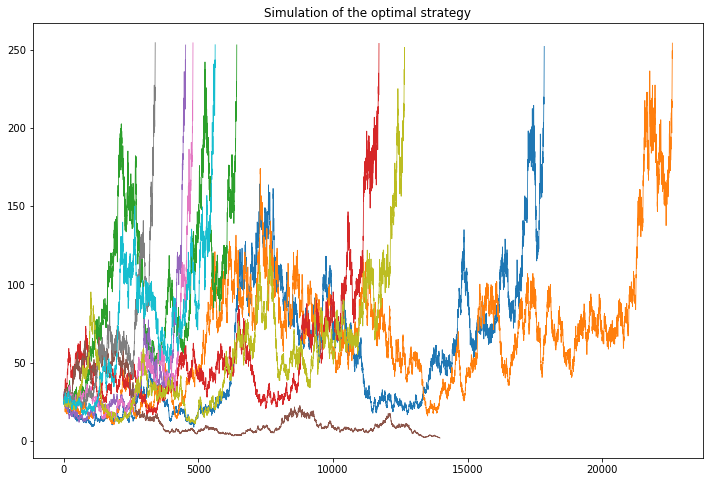

In [80]:
# Playing the optimal strategy
"""
Following the rule of Kelly at each trial, the participant
should bet 20% of the balance on heads every time.
This method would maximize the outcome of the play.
"""

def flip_coin(p):
    return True if rn.random() < p else False

N, pr, tracks = 10, .51, []
for _ in range(N):
    track = []
    balance = 25
    while balance > 2 and balance < 250:
        bet = (2*pr-1) * balance
        if flip_coin(pr):
            balance += bet
        else:
            balance -= bet
        track.append(balance)
    tracks.append(track)

won, bust = 0, 0
for _ in tracks:
    if _[-1] < 2:
        bust +=1 
    else:
        won +=1
print('\nThe number of busts: ', bust,
      '\nThe number of wins: ', won)

plt.figure(figsize=(12, 8))
for _ in tracks:
    plt.plot(_, linewidth=.8)
plt.title('Simulation of the optimal strategy')
plt.show()

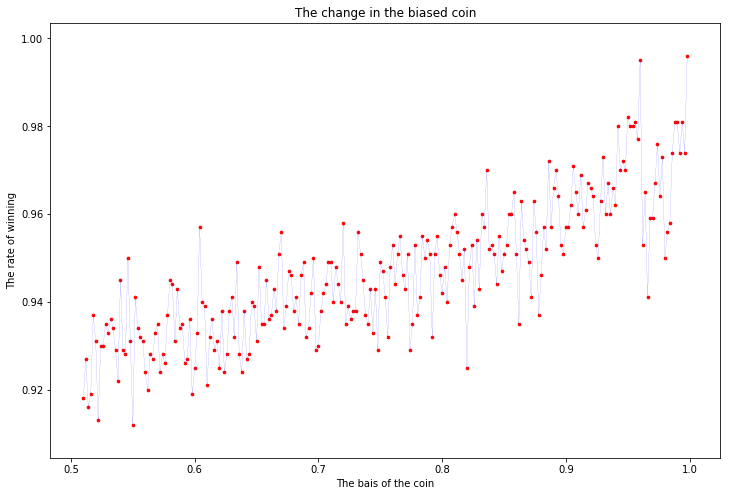

In [133]:
# An attempt to generalize the idea:

# I. Changing the bias of the coin to test the Kelly rule

def flip_coin(p):
    return True if rn.random() < p else False

N = 1000
results = []
for pr in range(510, 1000, 2):
    bust, win = 0, 0
    for _ in range(N):
        balance = 25
        while balance > 2 and balance < 250:
            bet = (2*(pr/1000)-1) * balance
            if flip_coin(pr/1000):
                balance += bet
            else:
                balance -= bet
        if balance < 2:
            bust += 1
        else:
            win += 1
    results.append([pr/1000, bust, win, win/(win+bust)])

results = pd.DataFrame(results)
results.columns=['Bias', 'Bust', 'Win', 'Rate']

plt.figure(figsize=(12, 8))
plt.scatter(results['Bias'], results['Rate'], s=7, color='red')
plt.plot(results['Bias'], results['Rate'], linewidth=.1, color='blue')
plt.title('The change in the biased coin')
plt.xlabel('The bais of the coin')
plt.ylabel('The rate of winning')
plt.show()

In [ ]:
# TODO:
# re-visualize the performance using the Kelly criterion
# tune the bias of the coin
# tune the number of tries before maxing out
# tune the interval of the kelly criterion

In [171]:
# Tunning the interval of the Kelly Criterion
"""
Holding the bias at .6 for the coin to land head
Changing the Kelly Criterion between 10 to 30%
"""

N, pr = 1000, 0.6
result = []

for i in range(5, 50):
    bust, win = 0, 0
    record = []
    for _ in range(N):
        balance = 25
        trials = 0
        while balance > 2 and balance < 250:
            trials += 1
            bet = (i/100) * balance
            if flip_coin(pr):
                balance += bet
            else:
                balance -= bet
        if balance < 2:
            bust += 1
        else:
            win += 1
        record.append(trials)
    result.append([i/100, int(np.mean(record)), bust, win, win/(win+bust)])
result = pd.DataFrame(result)
result.columns=['Percentage', 'Average trials',
                'Bust', 'Win', 'Rate']
result.head(10)

,Percentage,Average trials,Bust,Win,Rate
0,0.05,259,0,1000,1.000
1,0.06,230,0,1000,1.000
2,0.07,206,0,1000,1.000
3,0.08,179,0,1000,1.000
4,0.09,167,0,1000,1.000
5,0.10,157,0,1000,1.000
6,0.11,146,2,998,0.998
7,0.12,138,5,995,0.995
8,0.13,128,5,995,0.995
9,0.14,125,11,989,0.989


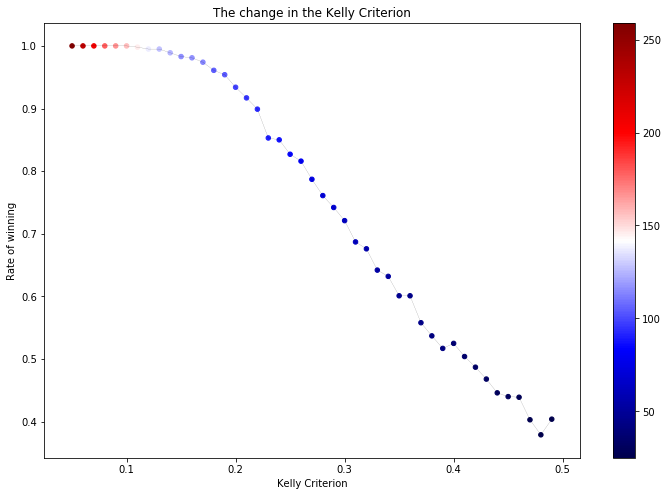

In [172]:
plt.figure(figsize=(12, 8))
jet=plt.get_cmap('seismic')

plt.scatter(result['Percentage'], result['Rate'],
            c= result['Average trials'], s=20, cmap=jet)
plt.plot(result['Percentage'], result['Rate'],
        linewidth=.1, color='black')
plt.title('The change in the Kelly Criterion')
plt.ylabel('Rate of winning')
plt.xlabel('Kelly Criterion')
plt.colorbar()
plt.show()

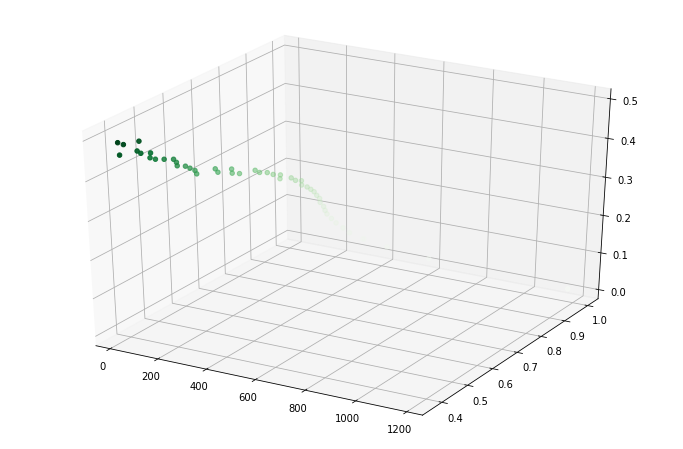

In [149]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
zdata = result['Percentage']
xdata = result['Average trials']
ydata = result['Rate']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()